# Part II - (Visualisations explicatives)
## by (Dieynaba Wane)


## Investigation Overview


> Dans cette enquête, j'ai voulu examiner les caractéristiques qui peuvent affecter le TAP ou Taux d'intérêt de l'emprunteur.

Décrivez ici les objectifs généraux de votre présentation. Ajoutez un résumé des informations clés au début du bloc-notes, comme vous l'avez ajouté dans le fichier README.md. Cela aidera votre bloc-notes à rester aligné sur les informations clés que vous souhaitez inclure dans votre diaporama.  


## Dataset Overview

> Notre dataset ProsperLoanData est composé de 113937 lignes et 81 colonnes , nous y avons pour le plus courant  des variables quantitifs  , nous avons aussi quelques variables  qualitatifs qui ont été pour certains tranformés en variables catégoriels ordinaux et pour d'autres en variables catégoriels nominaux. Ce dernier étant  trop volumineux , contenant 81 colonnes or toutes les colonnes ne seront pas forcément utiles pour nos recherches, nous  réduirons  les colonnes de notre dataset  à 20 colonnes .
Aussi nous travaillerons avec une copie de notre dataset pour ne pas nuire à son intégrité .



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv') 
cp = loan.copy()

In [3]:
# Réduisons le nombre de colonnes de notre dataset à 20 colonnes 
df_prosper = cp.loc[:,  ['ListingCreationDate','Term','LoanStatus' , 'ClosedDate',
                     'BorrowerAPR','LenderYield','BorrowerRate',
                     'ProsperRating (numeric)' ,'ProsperRating (Alpha)' ,
                     'ProsperScore', 'BorrowerState', 'Occupation',
                    'TotalProsperLoans', 'AmountDelinquent','IncomeRange','MonthlyLoanPayment'
                         ,'LoanOriginalAmount','LP_ServiceFees','LoanOriginationDate','Investors']] 
# supprimmons les lignes contenant les valeurs nulles dans nos variables 
df_prosper = df_prosper.dropna(subset=['ClosedDate','BorrowerAPR','ProsperRating (numeric)','ProsperRating (Alpha)',
     'ProsperScore','BorrowerState','Occupation','TotalProsperLoans','AmountDelinquent'])


In [4]:
# Renommons les variables ProsperRating (numeric) , ProsperRating (Alpha) pour moins 
# d'encombrements 
df_prosper = df_prosper.rename(columns={"ProsperRating (Alpha)": "ProsperRating _Alpha", "ProsperRating (numeric)": "ProsperRating_numeric"})



# convertissons ProsperRating(Alpha) ,IncomeRange en types de données catégoriques ordonnées
ordinal_var_dict = {'ProsperRating _Alpha': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_prosper[var] = df_prosper[var].astype(ordered_var)

In [5]:
# convertissons nos variables suivants en variables catégorielles  
df_prosper['ClosedDate'] = pd.to_datetime(df_prosper['ClosedDate'])
df_prosper['ListingCreationDate'] = pd.to_datetime(df_prosper['ListingCreationDate'])
df_prosper['LoanOriginationDate'] = pd.to_datetime(df_prosper['LoanOriginationDate']) 


In [6]:
# convertissons nos variables suivants en variables catégorielles  
df_prosper['LoanStatus'] = df_prosper['LoanStatus'].astype('category') 
df_prosper['BorrowerState'] = df_prosper['BorrowerState'].astype('category') 
df_prosper['Occupation'] = df_prosper['Occupation'].astype('category')
df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8251 entries, 33 to 113935
Data columns (total 20 columns):
ListingCreationDate      8251 non-null datetime64[ns]
Term                     8251 non-null int64
LoanStatus               8251 non-null category
ClosedDate               8251 non-null datetime64[ns]
BorrowerAPR              8251 non-null float64
LenderYield              8251 non-null float64
BorrowerRate             8251 non-null float64
ProsperRating_numeric    8251 non-null float64
ProsperRating _Alpha     8251 non-null category
ProsperScore             8251 non-null float64
BorrowerState            8251 non-null category
Occupation               8251 non-null category
TotalProsperLoans        8251 non-null float64
AmountDelinquent         8251 non-null float64
IncomeRange              8187 non-null category
MonthlyLoanPayment       8251 non-null float64
LoanOriginalAmount       8251 non-null int64
LP_ServiceFees           8251 non-null float64
LoanOriginationDate      8251

## Distribution du Taux d'intérêt de l'emprunteur 

>nous avons une distribution multimodale avec des valeurs entre **0** et **0.45** et  un pic plus élevé entre **0.3** et **0.4**.

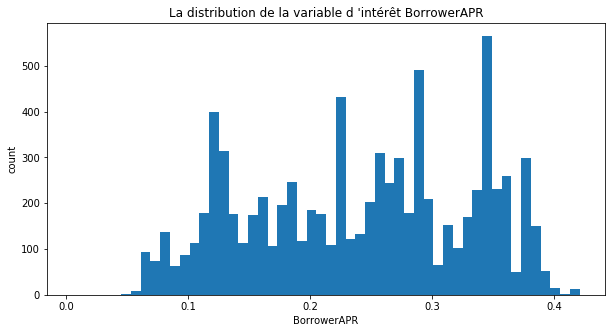

In [7]:
# créons une distribution  pour réprésenter la variable d'intéret  BorrowerAPR 
plt.figure(figsize=[10,5])
bins = np.arange(0.005, df_prosper['BorrowerAPR'].max()+0.008, 0.008)
plt.hist( df_prosper['BorrowerAPR'], bins = bins)
plt.xlabel('BorrowerAPR')
plt.ylabel('count')
plt.title("La distribution de la variable d 'intérêt BorrowerAPR");

## Graphique corrélation entre BorrowerAPR et LenderYield 

>Le Taux d'intérêt de l'emprunteur et le rendement du préteur ont une forte corrélation positive , c'est à dire plus le taux d'intérêt de l'emprunteur augmente plus le rendement du préteur est grande.

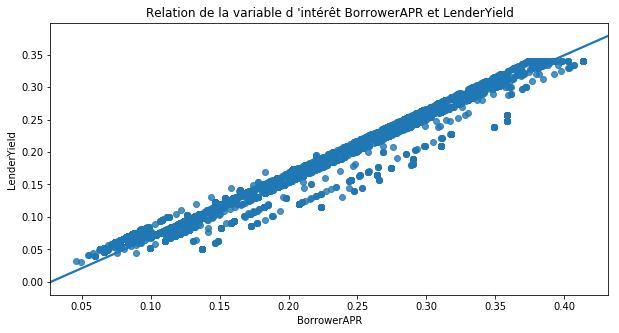

In [8]:
plt.figure(figsize=[10,5])
sb.regplot(data = df_prosper , x = 'BorrowerAPR' , y = 'LenderYield' );
plt.title("Relation de la variable d 'intérêt BorrowerAPR et LenderYield");

## Diagramme de vilion  entre BorrowerAPR et IncomeRange
>>Sur la relation entre BorrowerAPR vs IncomeRange , nous remarquons que les emprunteurs avec aucun revenu ou des revenus entre 1 et 24,999 dollars ont des taux APR supérieurs aux autres avec , pour des emprunteurs avec aucun revenu les taux APR minimum commencent à peu près  0.24.


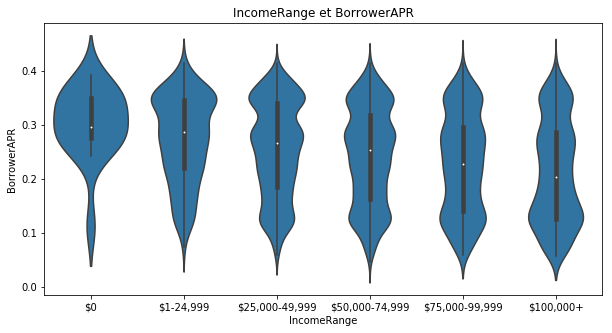

In [9]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,5]) 
sb.violinplot(data = df_prosper , x = 'IncomeRange', y = 'BorrowerAPR' , color = base_color); 
plt.title('IncomeRange et BorrowerAPR');

## Diagramme de boites à moustaches LoanStatus  BorrowerAPR pour chaque plage de salaire

>Pour chaque plage de salaire ceux qui ont le taux d'apr le plus bas sont ceux qui ont une fois tout complétement complété leurs prets , pour ceux qui perçoivent dans l'année entre 1 et 24,999 dollars se voient avoir des taux d'intéret plus bas s'ils un défaut sur leurs paiements .

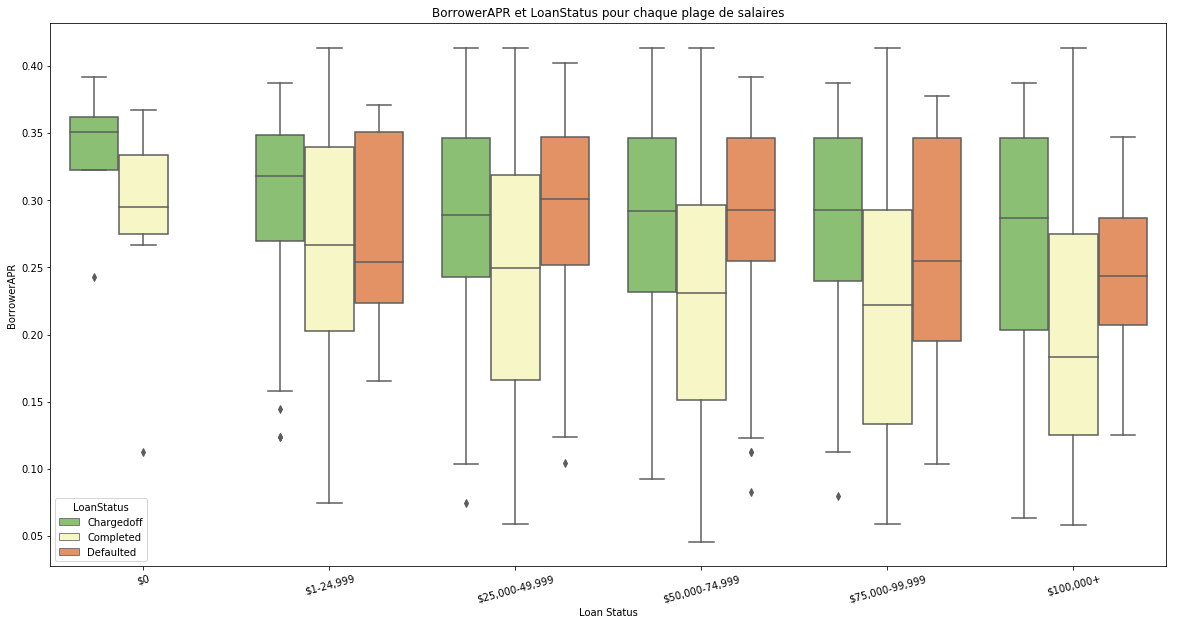

In [10]:
# LoanStatus et  BorrowerAPR pour chaque plage de salaire
plt.figure(figsize=[20,10])
sb.boxplot(x="IncomeRange", y="BorrowerAPR", hue="LoanStatus", data=df_prosper, palette="RdYlGn_r");
plt.title('BorrowerAPR et LoanStatus pour chaque plage de salaires');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local 
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 421906 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 